#**Smart Inventory Optimization**

---



~By

Shreyas Bailkar - A101

Kunal Shenoy - A123

Amogh Bedekar - A130

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://github.com/shreyas023/Smart_inventory/raw/main/Inventory_dataset.csv')

In [ ]:
df.head()

,SKU_ID,Item_Cost,Item_Count,Total_Cost,Lead_Time,Shelf_Life,EOQ,Lead_Time_Variability,Seasonality,Warehouse_Location,Customer_Reviews,Historical_Sales_Data,Demand_Fluctuation,ABC_Classification
0,SKU0001,10.50,150,1575.0,5,180,175,low,none,A1,4.5,250,increasing,A
1,SKU0002,5.25,300,1575.0,7,365,210,medium,seasonal,B2,4.0,350,stable,B
2,SKU0003,15.75,100,1575.0,3,90,90,high,none,C3,3.8,120,decreasing,C
3,SKU0004,8.00,200,1600.0,4,120,140,medium,none,A1,4.7,180,increasing,A
4,SKU0005,3.00,500,1500.0,6,240,320,high,seasonal,B2,4.2,400,stable,B


In [ ]:
df.describe()

,Item_Cost,Item_Count,Total_Cost,Lead_Time,Shelf_Life,EOQ,Customer_Reviews,Historical_Sales_Data
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,11.246766,208.880597,1942.910448,4.726368,227.164179,179.875622,4.158209,228.606965
std,5.261086,89.483885,317.375672,1.462789,84.441802,70.227199,0.339330,86.128101
min,3.000000,70.000000,1192.000000,2.000000,90.000000,70.000000,3.300000,80.000000
25%,7.000000,140.000000,1728.000000,4.000000,180.000000,125.000000,3.900000,160.000000
50%,9.950000,190.000000,1910.000000,5.000000,180.000000,170.000000,4.200000,220.000000
75%,14.700000,260.000000,2145.000000,6.000000,240.000000,230.000000,4.400000,290.000000
max,23.700000,500.000000,3300.000000,7.000000,365.000000,330.000000,4.800000,420.000000


In [ ]:
df.nunique()

SKU_ID                   200
Item_Cost                135
Item_Count                37
Total_Cost               151
Lead_Time                  6
Shelf_Life                 6
EOQ                       51
Lead_Time_Variability      3
Seasonality                2
Warehouse_Location         3
Customer_Reviews          15
Historical_Sales_Data     33
Demand_Fluctuation         3
ABC_Classification         3
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SKU_ID                 201 non-null    object 
 1   Item_Cost              201 non-null    float64
 2   Item_Count             201 non-null    int64  
 3   Total_Cost             201 non-null    float64
 4   Lead_Time              201 non-null    int64  
 5   Shelf_Life             201 non-null    int64  
 6   EOQ                    201 non-null    int64  
 7   Lead_Time_Variability  201 non-null    object 
 8   Seasonality            201 non-null    object 
 9   Warehouse_Location     201 non-null    object 
 10  Customer_Reviews       201 non-null    float64
 11  Historical_Sales_Data  201 non-null    int64  
 12  Demand_Fluctuation     201 non-null    object 
 13  ABC_Classification     201 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 22.1+ KB


In [ ]:
df.isna()

,SKU_ID,Item_Cost,Item_Count,Total_Cost,Lead_Time,Shelf_Life,EOQ,Lead_Time_Variability,Seasonality,Warehouse_Location,Customer_Reviews,Historical_Sales_Data,Demand_Fluctuation,ABC_Classification
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
df['ABC_Classification'] = le.fit_transform(df['ABC_Classification'])
df['Seasonality'] = le.fit_transform(df['Seasonality'])
df['Lead_Time_Variability'] = le.fit_transform(df['Lead_Time_Variability'])
df['Warehouse_Location'] = le.fit_transform(df['Warehouse_Location'])
df['Demand_Fluctuation'] = le.fit_transform(df['Demand_Fluctuation'])

df.head()

,SKU_ID,Item_Cost,Item_Count,Total_Cost,Lead_Time,Shelf_Life,EOQ,Lead_Time_Variability,Seasonality,Warehouse_Location,Customer_Reviews,Historical_Sales_Data,Demand_Fluctuation,ABC_Classification
0,SKU0001,10.50,150,1575.0,5,180,175,1,0,0,4.5,250,1,0
1,SKU0002,5.25,300,1575.0,7,365,210,2,1,1,4.0,350,2,1
2,SKU0003,15.75,100,1575.0,3,90,90,0,0,2,3.8,120,0,2
3,SKU0004,8.00,200,1600.0,4,120,140,2,0,0,4.7,180,1,0
4,SKU0005,3.00,500,1500.0,6,240,320,0,1,1,4.2,400,2,1


<ipython-input-70-d53c8ea6442a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='YlGnBu',annot=True, center=0)


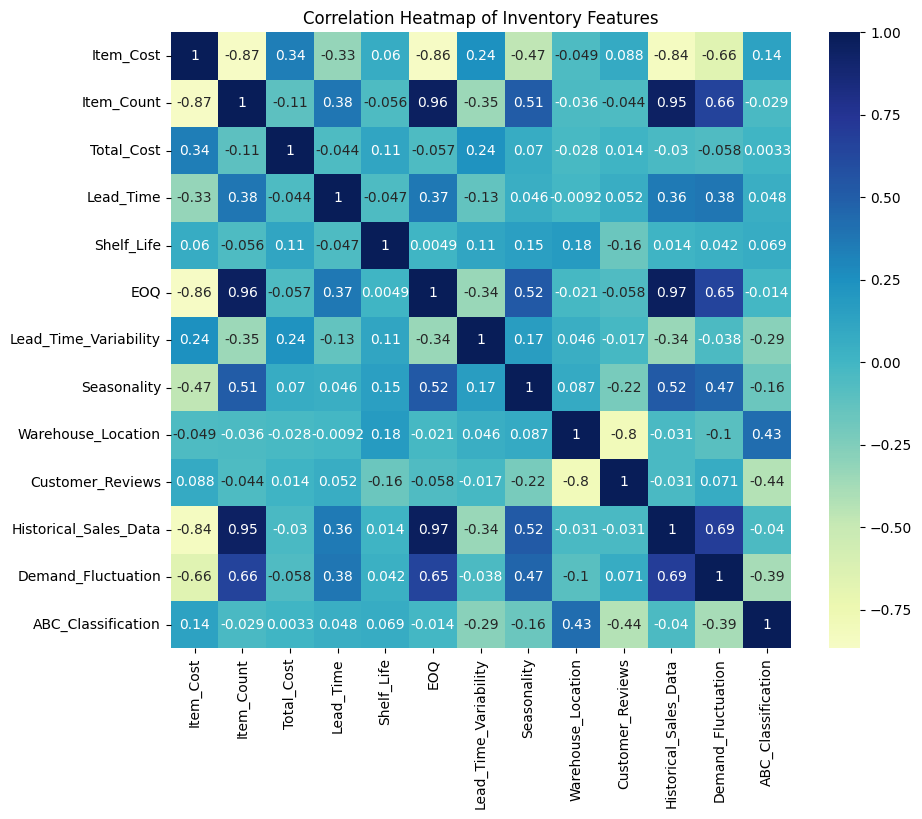

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True, center=0)
plt.title('Correlation Heatmap of Inventory Features')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['ABC_Classification','SKU_ID'],axis=1)
y = df['ABC_Classification']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       1.00      0.89      0.94        18
           2       0.92      0.97      0.94        35

    accuracy                           0.93        61
   macro avg       0.93      0.91      0.92        61
weighted avg       0.94      0.93      0.93        61



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[ 7  0  1]
 [ 0 16  2]
 [ 1  0 34]]


In [ ]:
print('Accuracy :',np.round(accuracy_score(y_test,y_pred),decimals=4)*100,'%')

Accuracy : 93.44 %
